In [55]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import requests
from bs4 import BeautifulSoup
plt.style.use('ggplot')
%matplotlib inline

In [2]:
!ls ../data/neighborhoods

cofo_data.csv                    median_rent_data.csv
crime_rate_data.csv              poverty_rate_data (1).csv
foreclosure_rate_data.csv        public_housing_data.csv
income_distribution_data (1).csv race_composition_data.csv


In [16]:
#neighborhood demographic data
income = pd.read_csv('../data/neighborhoods/income_distribution_data (1).csv')
crime_rate = pd.read_csv('../data/neighborhoods/crime_rate_data.csv')
median_rent = pd.read_csv('../data/neighborhoods/median_rent_data.csv')
poverty = pd.read_csv('../data/neighborhoods/poverty_rate_data (1).csv')
public_house = pd.read_csv('../data/neighborhoods/public_housing_data.csv')
race = pd.read_csv('../data/neighborhoods/race_composition_data.csv')
forclosure = pd.read_csv('../data/neighborhoods/foreclosure_rate_data.csv')


<AxesSubplot:>

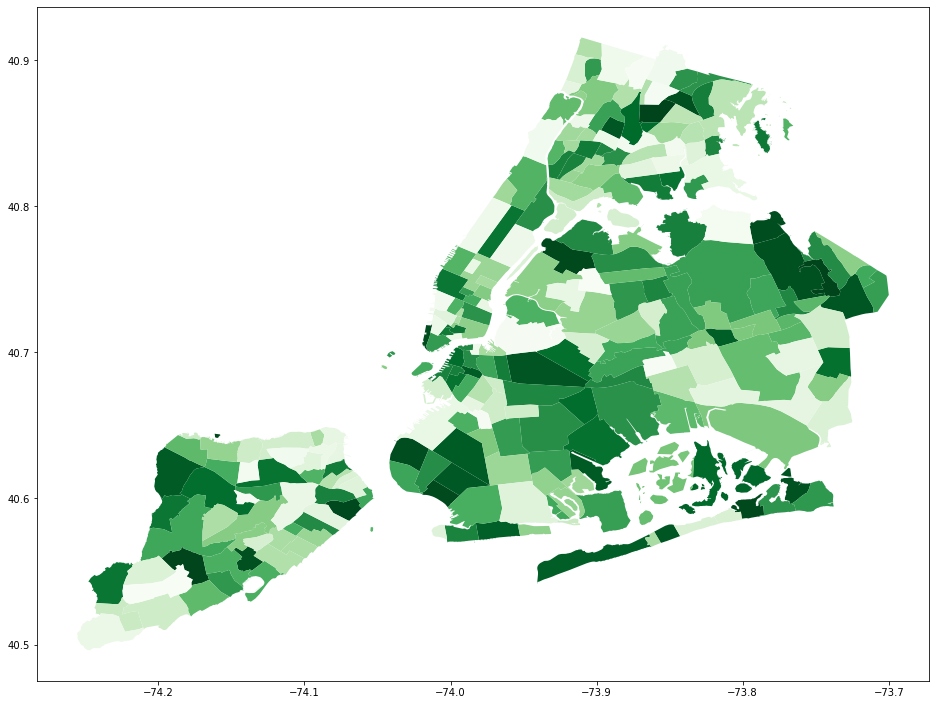

In [46]:
#districtmaps
nyc_m = gpd.read_file('../data/map.geojson')
nyc_m.plot(figsize=(16, 16), cmap = 'Greens_r', legend=True)

<AxesSubplot:>

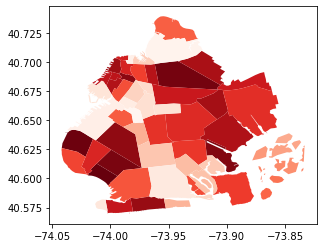

In [53]:
nyc_m[nyc_m.borough == 'Brooklyn'].plot(cmap='Reds_r')